<a href="https://colab.research.google.com/github/saikatdgp2001/Stock_Market_Trend_Analysis/blob/main/Trend_stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.colors as mcolors

import random
import datetime as dt

# Data
import yfinance as yf
%matplotlib inline

yf.pdr_override()

In [ ]:
# Nifty 50
STOCK = "^NSEI"
end = dt.datetime(2023, 2, 1)
start = dt.datetime(2018, 1, 1)
dataNifty = yf.download(STOCK, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataNifty.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400
2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300
2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900
2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900
2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000


In [ ]:
dataNifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1253 entries, 2018-01-02 to 2023-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1253 non-null   float64
 1   High       1253 non-null   float64
 2   Low        1253 non-null   float64
 3   Close      1253 non-null   float64
 4   Adj Close  1253 non-null   float64
 5   Volume     1253 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.5 KB


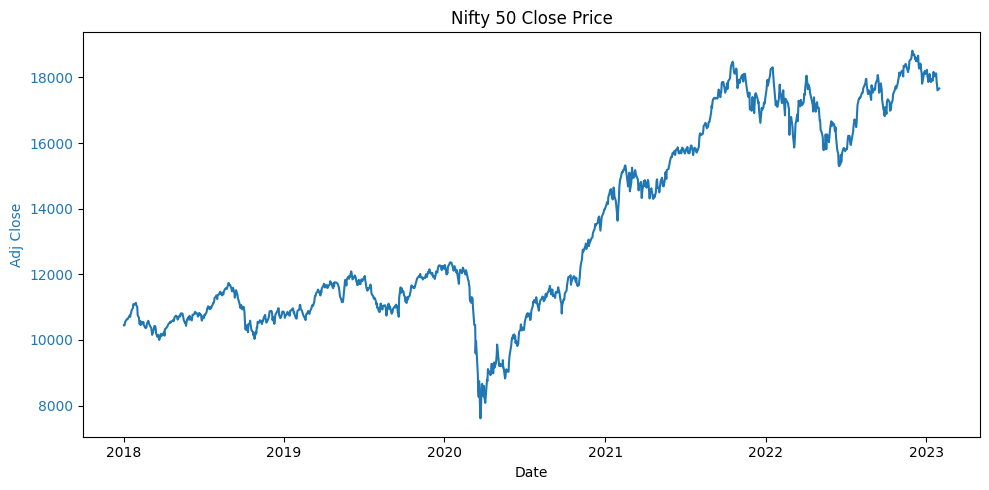

In [ ]:
# Close Price
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_ylabel('Adj Close', color=color)
ax1.set_xlabel('Date') 
ax1.set_title('Nifty 50 Close Price') 
ax1.plot(
    dataNifty.index,
    dataNifty["Adj Close"],
    color=color
)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

# **Clustering using K-Means**

In [ ]:
# Model Parameters

# n_clusters for KMeans
n_clusters = 7

# n_components for PCA
n_components = 5

# Columns to use for clustering
COLS = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# **Optimizing the number of clusters**
In the K-means clustering algorithm, the "Elbow Method" is often used to select the optimal number of clusters. It is a powerful tool for fine-tuning the performance of the K-means clustering algorithm and ensuring that it is well-suited to the specific dataset and problem at hand.

n_clusters = 7

The value of n_clusters strikes a balance between capturing the complexity of the data while avoiding overfitting and excessive noise.

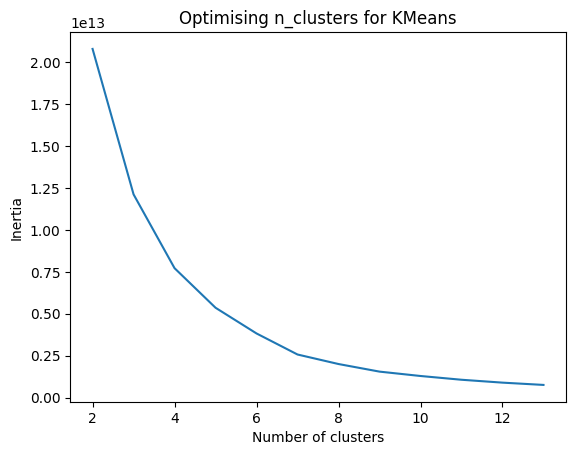

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Copy the data
dataTrial = dataNifty.copy()
dataTrial = dataTrial[COLS]

# Convert DataFrame to a NumPy array
X = dataTrial.values

# print(X)

# Initialize the k-means model
# kmeans = KMeans(n_clusters=n_clusters)

# Optimising n_clusters for KMeans
inertias = []
for k in range(2,2*n_clusters):
    kmeans = KMeans(n_clusters=k,random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,2*n_clusters), inertias)
plt.title('Optimising n_clusters for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# copy the data
data = dataNifty.copy()

# Convert DataFrame to a NumPy array
X = data.values

# Initialize the k-means model
kmeans = KMeans(n_clusters=n_clusters,random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster for each data point
labels = kmeans.predict(X)

# Add the cluster labels to the data
data["Cluster"] = labels

# load the data
X = data  # your data

# apply PCA to the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [ ]:
# Setting the Color Palette from matplotlib.colors

# randColors = list(mcolors.CSS4_COLORS.keys())
# randColors = random.sample(randColors, n_clusters)
randColors=['royalblue','darkmagenta','plum','red','lawngreen','aqua','fuchsia']

Text(0.5, 1.0, 'Cluster distribution')

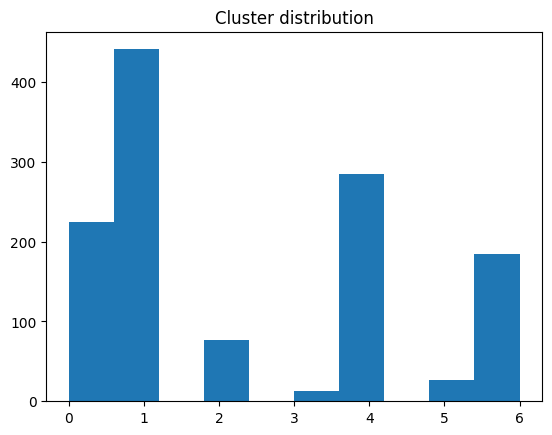

In [ ]:
# Cluster distribution
plt.hist(data.Cluster)
plt.title('Cluster distribution')

In [ ]:
# Helper Function

# Plot the clusters v/s the Close price
def plotCluster(data,size=(10,5),csize=10,title="Nifty 50 Close Price",candlestick=False):
    fig, ax1 = plt.subplots(figsize=(size))

    # Set the label parameters
    color = 'tab:blue'
    ax1.set_ylabel('Adj Close', color=color)  
    ax1.set_xlabel('Date')
    ax1.set_title(title)

    # Plot with scatter
    ax1.scatter(
        data.index,
        data["Adj Close"],
        c=data["Cluster"],
        # Our color palette
        cmap=mcolors.ListedColormap(randColors),
        s=csize
    )
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', labelcolor='black', labelrotation=-45)

    # plot with candlesticks
    if candlestick:
        ax2 = ax1.twinx()
        
        # Plotting the candlesticks using mpl_finance
        ohlc = data.copy()
        ohlc['Date'] = ohlc.index
        ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
        ohlc = ohlc.loc[:, ['Date','Open', 'High', 'Low', 'Close']]
        ohlc = ohlc.astype(float)

        # print(ohlc.head())
        candlestick_ohlc(ax2, ohlc.values, width=1,
                        colorup='green', colordown='red', alpha=0.4)

    fig.tight_layout()
    # Colorbar
    fig.colorbar(
        plt.cm.ScalarMappable(
            cmap=mcolors.ListedColormap(randColors), 
            norm=plt.Normalize(0, n_clusters)
        ),
        ax=ax1,
    )
    
    plt.show()

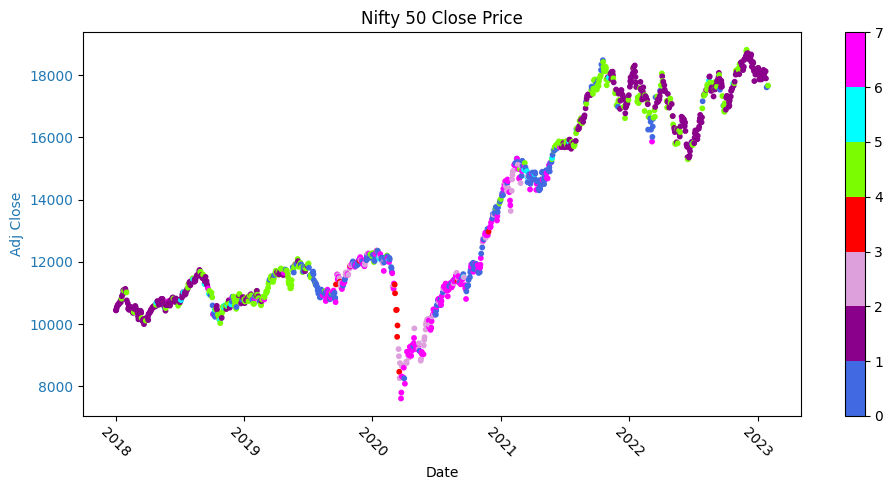

In [ ]:
plotCluster(data)

# **Pattern observed in the Nifty 50 dataset for May 2019**
The Nifty 50 index has been on a steady upward trend since the beginning of 2019, this is clearly shown by the Pattern 5.

Pattern 1 observed on 21st May, 2019 indicates a significant breakthrough in the market, with prices surpassing their previous resistance level. This may be viewed as a potential entry point for investors who are seeking to capitalize on the upward momentum of the market

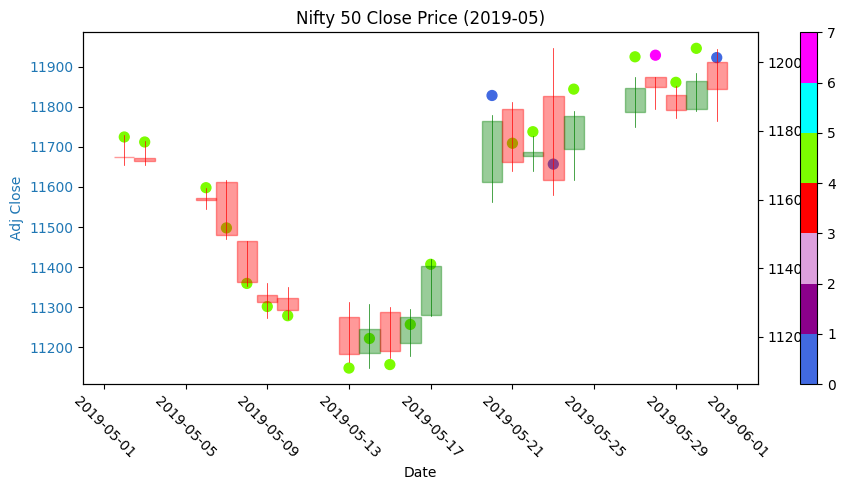

In [ ]:
# Plotting for a particular YEAR|MONTH  (2019|May)
data2019 = data[data.index.year == 2019]
data2019 = data2019[data2019.index.month == 5]
plotCluster(data2019, csize = 50,title='Nifty 50 Close Price (2019-05)',candlestick=True)

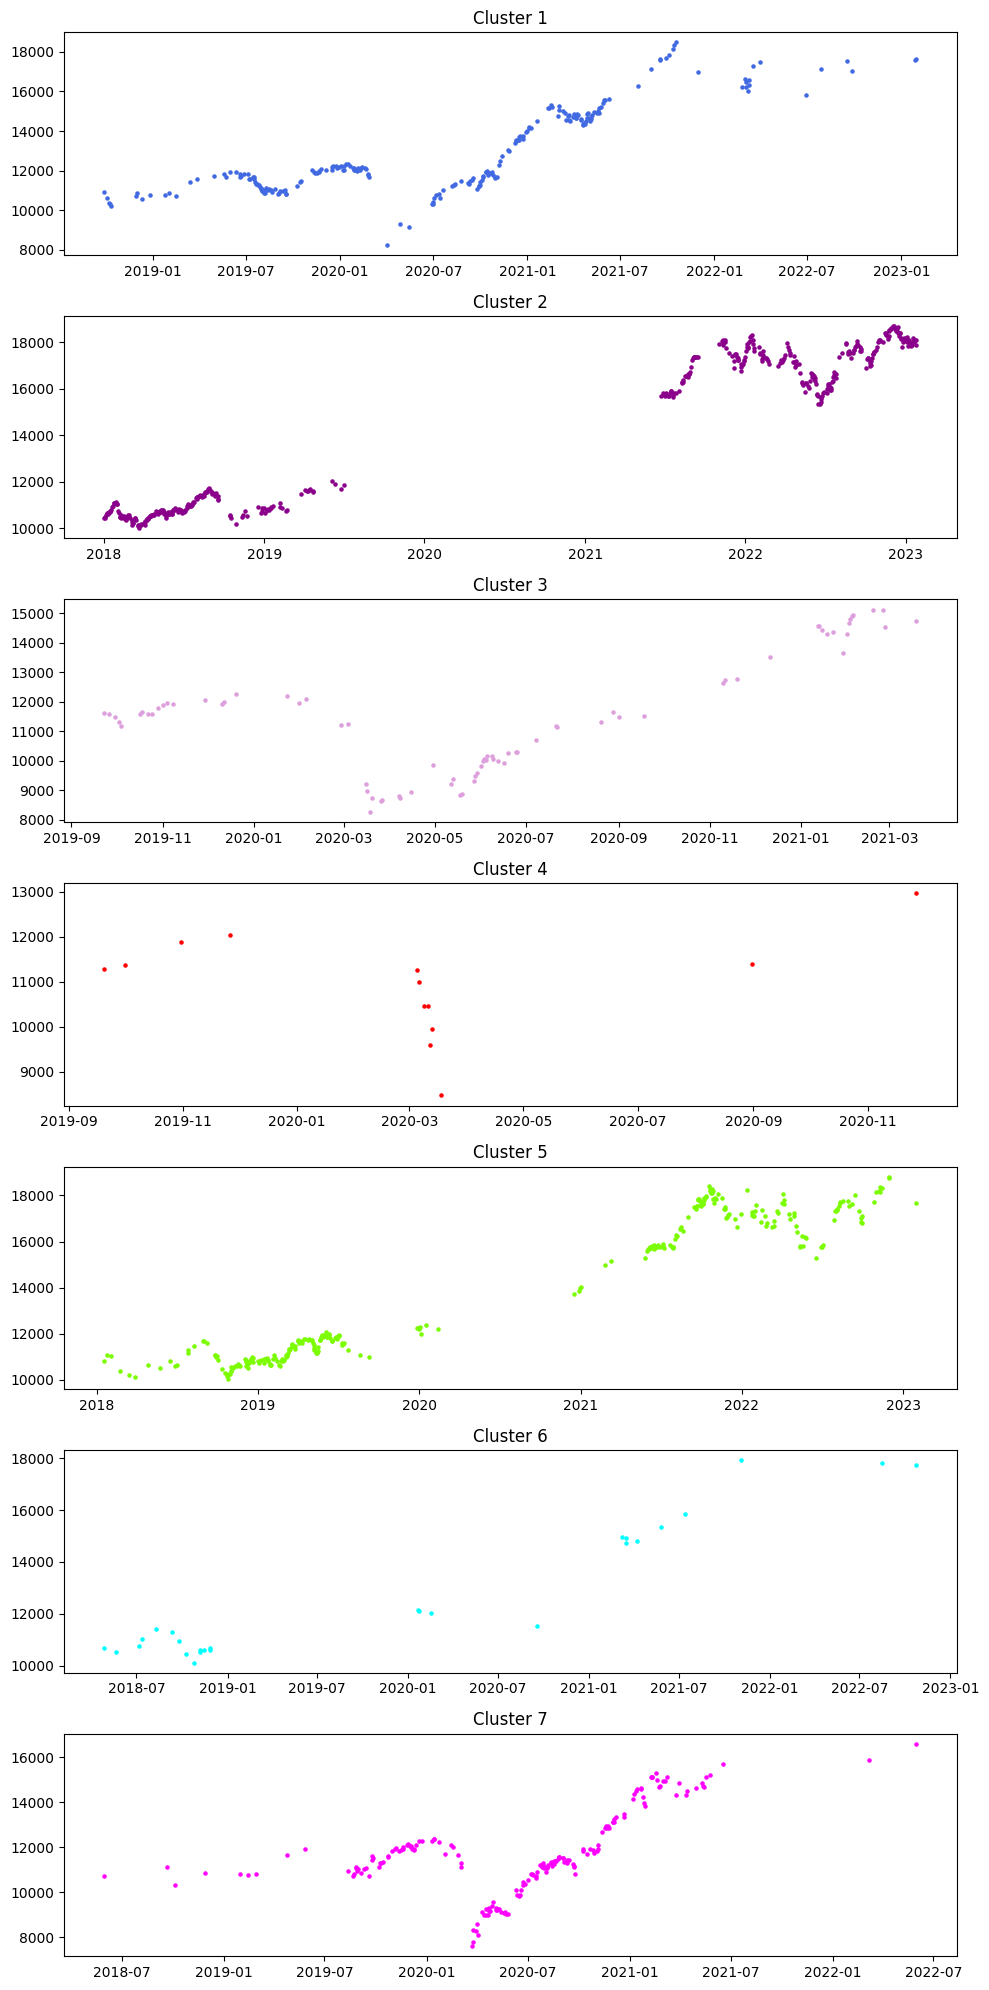

In [ ]:
# Plotting for all Clusters
plt.figure(figsize=(10,20))
for clus in range(n_clusters):
    # Create a subplot for each cluster
    ax = plt.subplot2grid((n_clusters,1), (clus,0))
    # Filter data according to Cluster
    dataN = data[data.Cluster == clus]
    ax.scatter(
        dataN.index,
        dataN["Adj Close"],
        c=randColors[clus],
        s=5
    )
    ax.set_title('Cluster {}'.format(clus+1))
plt.tight_layout()
plt.show()

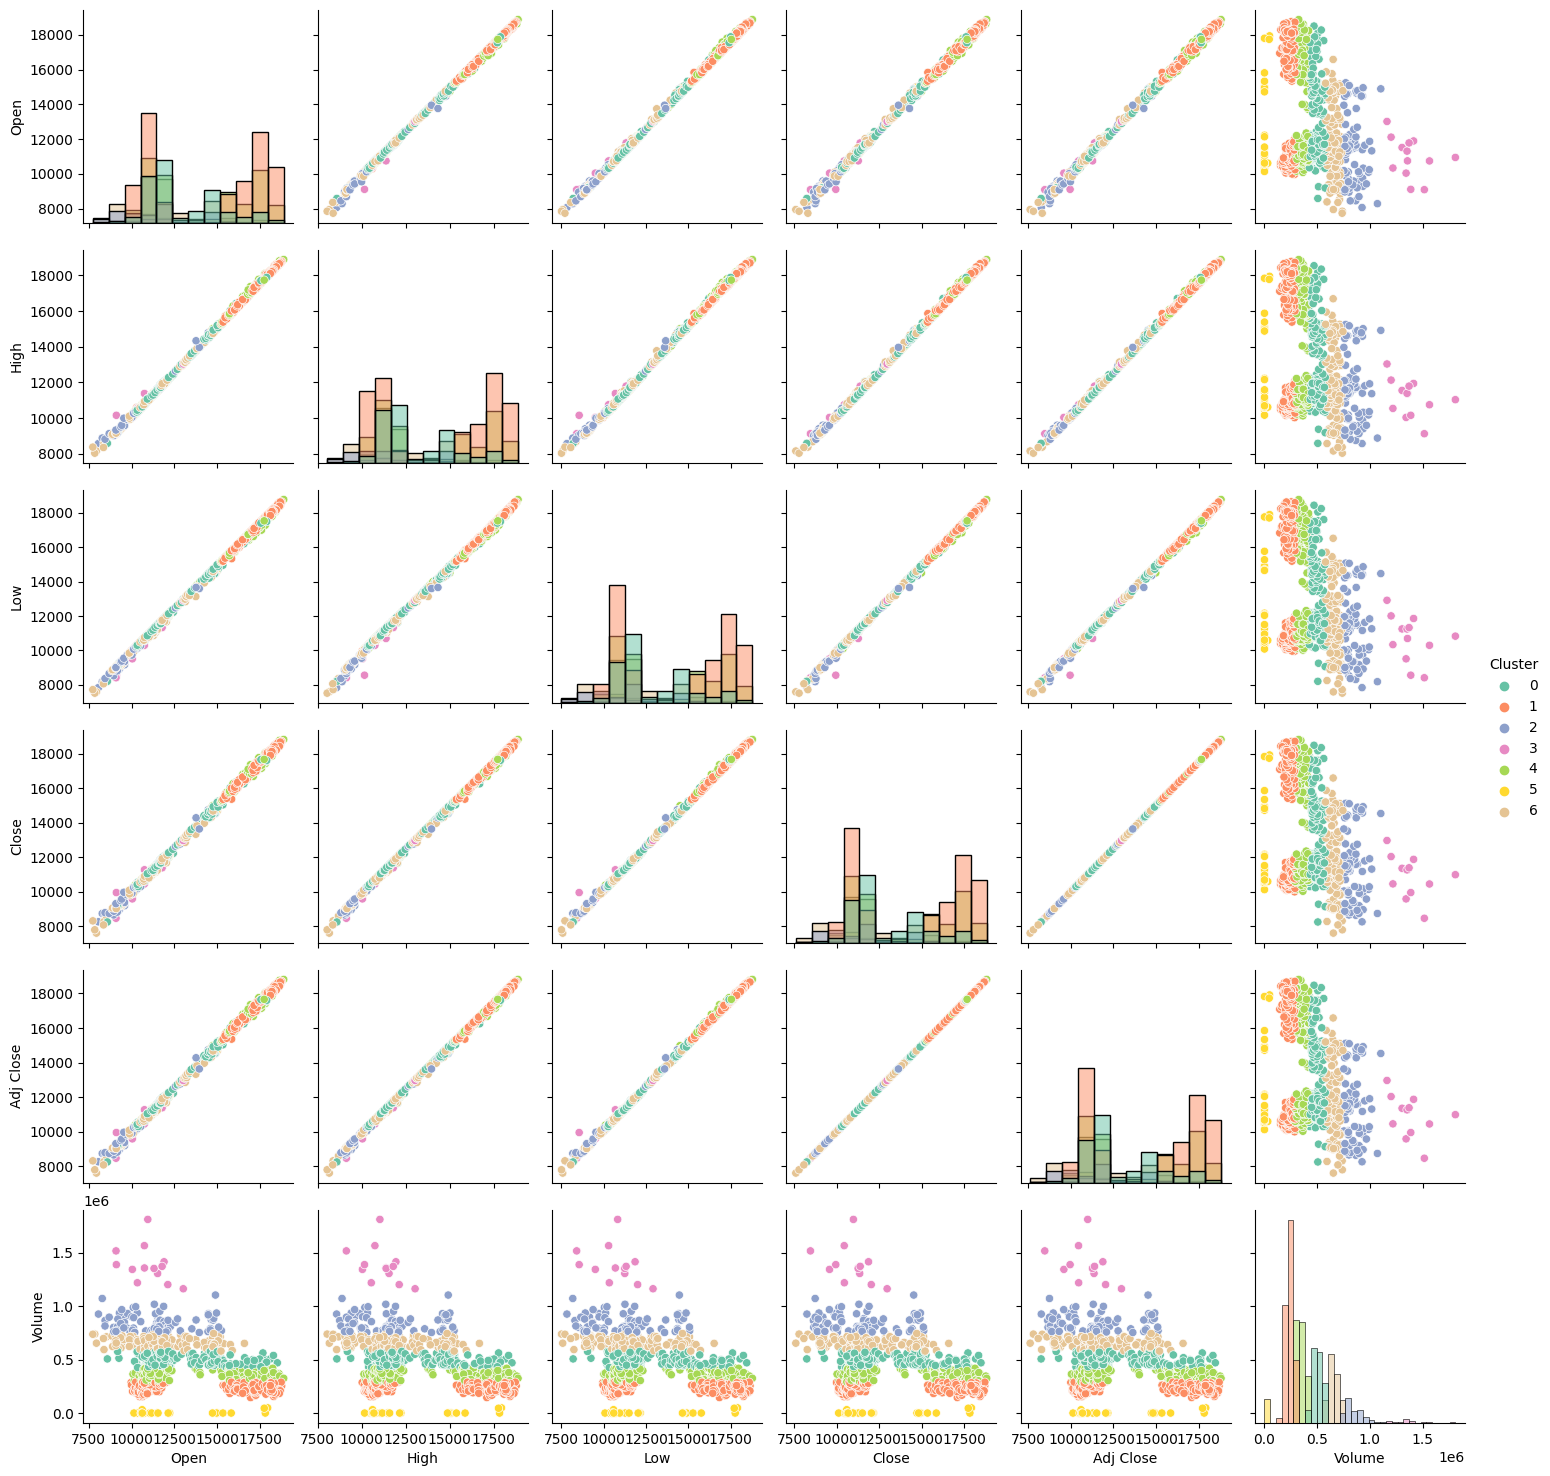

In [ ]:
# Pair Plot
import seaborn as sns
sns.pairplot(data, hue="Cluster", palette="Set2", diag_kind="hist", kind="scatter", height=2.5)

# **Predicting the Future Stock Trends**

In [ ]:
# Build another model on kmeans clusters

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[COLS],data.Cluster)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# Train the model
from sklearn.naive_bayes import GaussianNB

# MODEL
model = GaussianNB()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

(939, 5) (939,) (314, 5) (314,)
Accuracy: 0.9331210191082803


In [ ]:
# Helper Function

# Plot the predicted clusters v/s the Close price
def helperPlotTrain(start, end):
    # Prediction on new test data
    data = yf.download(STOCK, start, end)
    data['Cluster'] = model.predict(data[COLS]) 

    # Plot uisng the helper function
    plotCluster(data,csize=50,title='Nifty 50 Trend Prediction',candlestick=True)
    
    # return y_pred, test_data

[*********************100%***********************]  1 of 1 completed


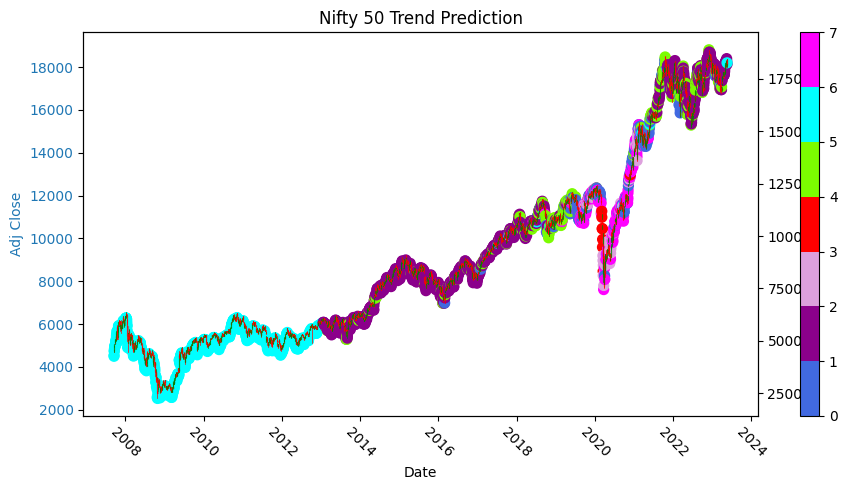

In [ ]:
helperPlotTrain(dt.datetime(2000,1,1), dt.datetime.now())

# **Conclusion**

***Pattern 1*** indicated a significant breakthrough in the market, with prices surpassing their previous resistance level, potentially indicating an entry point for investors.

***Pattern 2*** revealed a sustained period of growth in stock prices, suggesting a positive trend in the market.

***Pattern 4*** highlighted a period of volatility and instability, with prices fluctuating rapidly and unpredictably.